In [27]:
import pandas as pd
%matplotlib inline

In [28]:
read_csv = lambda path: pd.read_csv(path, parse_dates=[0], index_col=0)
metrics = [
    read_csv('../layers/application/content-locality/content-locality.csv'),
    read_csv('../layers/protocol/ipv6-transition/ipv6-transition.csv'),
    read_csv('../layers/physical/undersea-cables/undersea-cables.csv'),
]

<AxesSubplot:>

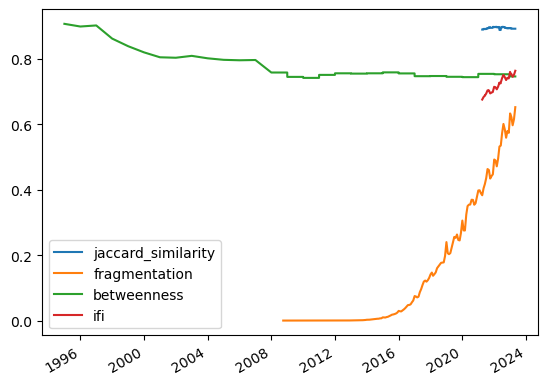

In [29]:
merged_df = metrics[0]
for metric in metrics[1:]:
     merged_df = merged_df.merge(metric, left_index=True, right_index=True, how="outer")

merged_df = merged_df\
.sort_index()\
.fillna(method='ffill')

ifi = merged_df.dropna().mean(axis=1)

merged_df['ifi'] = ifi

merged_df.plot()